# Plots y visualización de los datos

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mainpath = "D://Curso-Machine-Learning/python-ml-course/datasets/"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)

In [4]:
data = pd.read_csv(fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
%matplotlib inline
# Para que es en linea? Hacerlo en la linea anterior al grafico

In [7]:
#savefig("path donde guardar la imagen.jpg/png")

### Scatter Plot

In [ ]:
# Nube dispersión o nube de puntos

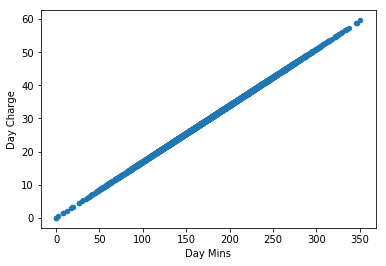

In [8]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")
# Imaginando que hay correlatividad o regresion lineal entre las columnas Day Mins y Day Charge
# Esto es: Mientras mas carga, mas minutos posibles para realizar llamadas

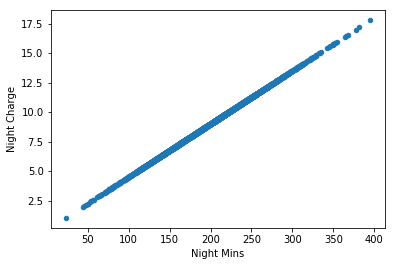

In [9]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

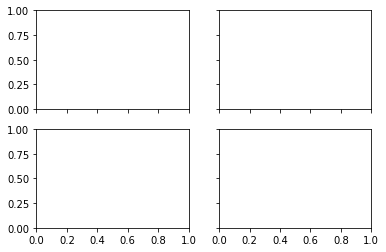

In [11]:
# Si debo comparar las dos de dia y las dos de noche?
# figure para hacer el dibujo
# axs = ejes

#subplots(2,2) matriz de dos por dos
#plt.subplots(2,2, sharex=True, sharey=True) que comparte el eje x y el eje y

figure, axs = plt.subplots(2,2, sharex=True, sharey=True)

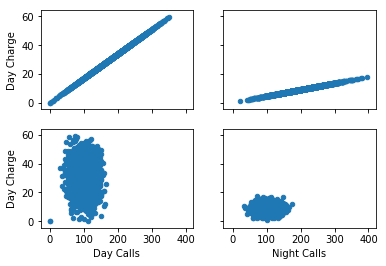

In [14]:
figure, axs = plt.subplots(2,2, sharex=True, sharey=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

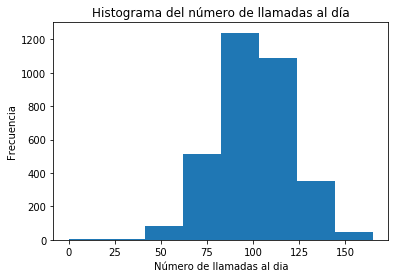

In [16]:
# bins = divisiones
# hist => histpgrama
# xlabel => label en eje x
# ylabel => label en eje y
# title => titulo
plt.hist(data["Day Calls"], bins=8)
plt.xlabel("Número de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

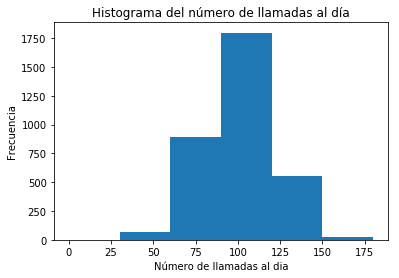

In [18]:
# Tambien se puede pasar donde se quieren las divisiones
plt.hist(data["Day Calls"], bins=[0, 30, 60, 90, 120, 150, 180])
plt.xlabel("Número de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

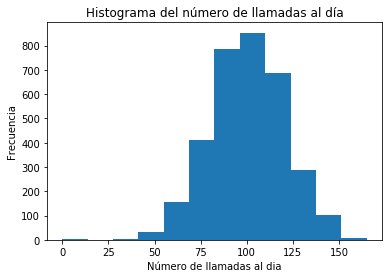

In [30]:
# Regla de sturges -> regla para obtenerel número de clases que deben considerar para elaborar un histograma
# 3333 rows y 21 columns
# np.log2(3333) + 1 = 12.702605602110248
# np.ceil(1 + np.log2(3333)) = 13.0
# int(np.ceil(np.log2(3333)) = 13
k = int(np.ceil(np.log2(3333)))

plt.hist(data["Day Calls"], bins=k)
plt.xlabel("Número de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

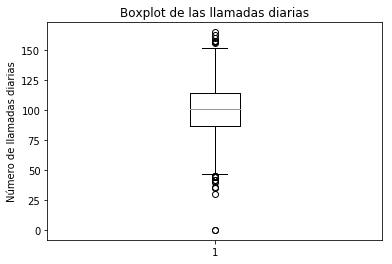

In [32]:
# Para comprender la distribucion de los valores numericos
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [ ]:
# ¿Como se lee?
# La caja indica donde esta la gran mayoria de los datos
# Es decir donde se concentran o condensan los valores.
# Quantiles -> min, max, 25% (borde inferior de la caja), 50%(medio, media, moda), 75%(borde superior de la caja)

In [34]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [36]:
# 75% - 25% -> rango interquartil
# 114 - 87 = 27 => altura de la caja
IQR = data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [37]:
# el "bigote" se ubica a 1,5 veces el rango interquartilico
# si hay datos ubicados mas alla de dicho rango, se grafican con circulos
# Son valores outliers = fuera de lugar
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [38]:
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5